In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Simple-linear-regression.csv")
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


Text(0, 0.5, 'GPA')

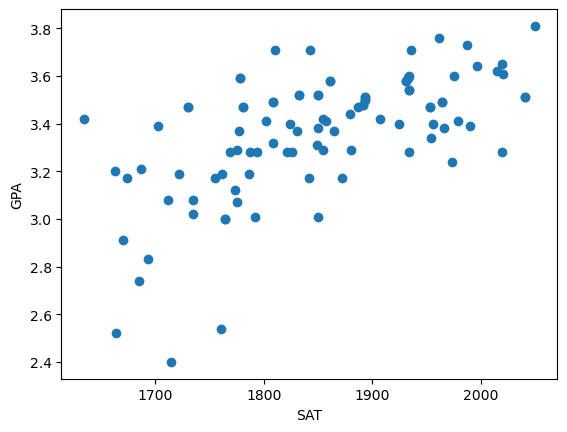

In [4]:
#Scatter Plot 
plt.scatter(df["SAT"], df["GPA"])
plt.xlabel("SAT")
plt.ylabel("GPA")


In [5]:
df.corr()

,SAT,GPA
SAT,1.000000,0.612552
GPA,0.612552,1.000000


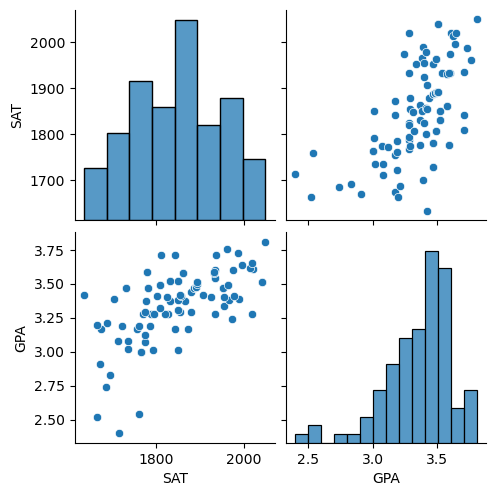

In [6]:
import seaborn as sns

sns.pairplot(df)

In [7]:
#Independent and Dependent Features

X = df[["SAT"]]
y = df["GPA"]

In [8]:
#Train Test Split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [9]:
X_train.shape

(75, 1)

In [10]:
#Standardize

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)

In [11]:
X_test = scalar.transform(X_test)

In [12]:
#Apply Simple Linear Regression

from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs = -1)
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [13]:
print("Coeeficient or Slope: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coeeficient or Slope:  [0.14365448]
Intercept:  3.3629333333333333


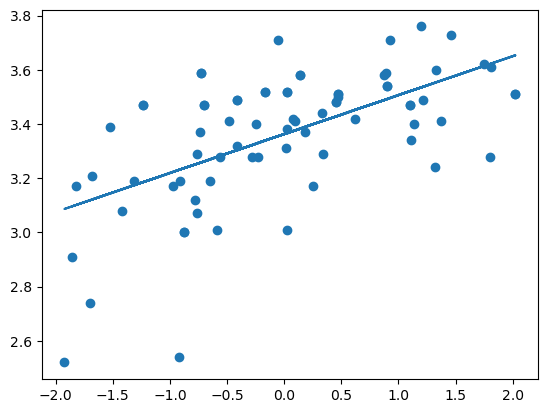

In [14]:
#Plotting Best Fit Line for X_train data

plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [15]:
#Prediction of Test Data

y_pred = regression.predict(X_test)
y_pred

array([3.66707381, 3.0413859 , 3.49109909, 3.47906663, 3.57683036,
       3.33768522, 3.08500356, 3.30610001, 3.1932957 , 3.1617105 ,
       3.35422985, 3.24443366, 3.49260314, 3.3737826 , 3.43093679,
       3.13012529, 3.58735876, 3.62195209, 3.1932957 , 3.49260314,
       3.42191244, 3.53772487, 3.27150669, 3.54073298, 3.48809097])

In [16]:
#Performance Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

0.05005981782315085
0.15665021966130427
0.22374051448754392


In [17]:
#R Squared 

from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
score

0.4266412160203985

In [18]:
#Adjusted R2

1 - (1 - score) * (len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

0.4017125732386767

In [19]:
#OLS

import statsmodels.api as sm

X_train_ols = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_ols).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     38.95
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           2.57e-08
Time:                        10:44:20   Log-Likelihood:                 15.548
No. Observations:                  75   AIC:                            -27.10
Df Residuals:                      73   BIC:                            -22.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3629      0.023    146.100      0.0

In [24]:
print(regression.predict(scalar.transform([[1764]])))

[3.23691337]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
